In [2]:
import numpy as np
from random import normalvariate
from math import sqrt

import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

from scipy import stats
from scipy.stats import norm

%matplotlib ipympl 

n = 40
N = 2
σ = 2.4
Θ_0 = (-1)**N * N
Θ_1 = -2
Θ_2 = -5
Θ_3 = -0.02

template = '{:.' + str(4) + 'f}'

# вектор ошибок, распределенный нормально
E = (np.random.normal(loc=0.0, scale=np.sqrt(σ), size=n))

x = np.arange(40, dtype='float')
Y = np.arange(40, dtype='float')
Y_S = np.arange(40, dtype='float')

for k in range(40):
    x[k] = -4 + (k+1)*0.2
    # вектор наблюдений
    Y[k] = Θ_0 + Θ_1*x[k] + Θ_2*x[k]**2+Θ_3*x[k]**3 + E[k]
    # полезный сигнал
    Y_S[k] = Θ_0 + Θ_1*x[k] + Θ_2*x[k]**2+Θ_3*x[k]**3

m = 0
# квантиль распределения стьюдента t_0,975(n-s), s - кол-во неизвестных параметров
kvantil = st.t.ppf(0.975, n - m-1)
# пусть для певого шага статистика = kvantil + 1 (чтобы мы могли зайти в цикл)
T_Y = kvantil + 1

print("____________ЗАДАНИЕ №1____________ \n")
# Подобрать порядок многочлена mˆ в модели (1), используя критерий Фишера, и вычислить
# оценки неизвестных параметров (θ0, . . . , θmˆ ) методом наименьших квадратов.

# мы завершаем проверку гипотез, если статистика < квантиля. если это случается при m = 1
# продолжаем проверку дальше, т.к. у нас не может быть модель из одного параметра
while (abs(T_Y) > kvantil) or ((abs(T_Y) < kvantil) and (m == 1)):

    m += 1
    X = np.zeros((40, m+1))

    for j in range(m+1):
        for i in range(40):
            X[i][j] = x[i]**j

    X_tr = np.transpose(X)
    X_tr_X = np.linalg.inv(np.matmul(X_tr, X))
    Thetta = np.matmul(np.matmul(X_tr_X, X_tr), Y)
    E_sr = Y - np.matmul(X, Thetta)
    norm_E_sr = np.sqrt(np.matmul(np.transpose(E_sr), E_sr))
    T_Y = (Thetta[m] * np.sqrt(n - (m + 1))) / \
        (np.sqrt(X_tr_X[m][m]) * norm_E_sr)
    kvantil = st.t.ppf(0.975, n - (m + 1))

    if ((abs(T_Y) < kvantil) and (m == 1)):
        print("|T_Y| = ", template.format(abs(T_Y)), "< t_0,975(", n - (m + 1), ") = ",
              template.format(kvantil), " => H0 принимается, но m = 1 => смотрим дальше")
    elif abs(T_Y) > kvantil:
        print("|T_Y| = ", template.format(abs(T_Y)), "> t_0,975(", n - (m + 1), ") = ",
              template.format(kvantil), " => H0 не принимается, thetta_", m, "!=0")
    elif abs(T_Y) < kvantil:
        print("|T_Y| = ", template.format(abs(T_Y)), "< t_0,975(", n - (m + 1), ") = ",
              template.format(kvantil), " => H0 принимается, thetta_", m, "=0 => m^ = ", m-1, '\n')
m -= 1
X = np.zeros((40, m+1))
for j in range(m+1):
    for i in range(40):
        X[i][j] = x[i]**j
print(len(np.transpose(X)))
X_tr = np.transpose(X)
X_tr_X = np.linalg.inv(np.matmul(X_tr, X))
Thetta = np.matmul(np.matmul(X_tr_X, X_tr), Y)
E_sr = Y - np.matmul(X, Thetta)
norm_E_sr = np.sqrt(np.matmul(np.transpose(E_sr), E_sr))

print("____________ЗАДАНИЕ №6____________ \n")
# Вычислить оценку дисперсии σ2 случайной ошибки.
σ_sr = 1/(40)*norm_E_sr**2


print("Оценки неизвестных параметров:")
for i in range(m+1):
    print("thetta_", i, "^ = ", template.format(Thetta[i]))

Y_signal = np.zeros(n)
for j in range(m+1):
    for i in range(n):
        Y_signal[i] += Thetta[j] * (x[i] ** j)

# ____________ЗАДАНИЕ №2____________ \n
# В предположении нормальности ошибок построить доверительные интервалыуровней
# надёжности α1 = 0.95 и α2 = 0.99 для параметров (θ0, . . . , θmˆ ).

# проверим alpha1 = 0.95, kvantil1 = t_(1-alpha1/2)(n-m-1) = - t_(alpha1/2)(n-m-1)
alpha1 = 0.95
# проверим alpha2 = 0.99, kvantil2 = t_(1-alpha2/2)(n-m-1) = - t_(alpha2/2)(n-m-1)
alpha2 = 0.99
kvantil1 = st.t.ppf(1/2+alpha1/2, n - m - 1)
kvantil2 = st.t.ppf(1/2+alpha2/2, n - m - 1)
# Оценка для уровня надежности = 0.95

for i in range(m+1):
    a = Thetta[i] - kvantil1 * norm_E_sr * \
        (np.sqrt(X_tr_X[m][m])) / np.sqrt(n - m - 1)
    b = Thetta[i] + kvantil1 * norm_E_sr * \
        (np.sqrt(X_tr_X[m][m])) / np.sqrt(n - m - 1)
    print("Доверительный интервал для thetta_", i,
          " = [", template.format(a), ",", template.format(b), "]")
print('\n')

# Оценка для уровня надежности = 0.99
for i in range(m+1):
    a = Thetta[i] - kvantil2 * norm_E_sr * \
        (np.sqrt(X_tr_X[m][m])) / np.sqrt(n - m - 1)
    b = Thetta[i] + kvantil2 * norm_E_sr * \
        (np.sqrt(X_tr_X[m][m])) / np.sqrt(n - m - 1)
    print("Доверительный интервал для thetta_", i,
          " = [", template.format(a), ",", template.format(b), "]")
print('\n')

# ____________ЗАДАНИЕ №3____________
# В предположении нормальности ошибок построить доверительные интервалы уровней
# надёжности α1 = 0.95 и α2 = 0.99 для полезного сигнала (1).

# Оценка для уровня надежности = 0.95
a_95 = np.zeros(n)
b_95 = np.zeros(n)
for i in range(n):
    matr_1 = np.matmul(X[i], X_tr_X)
    matr_2 = np.matmul(matr_1, np.transpose(X[i]))
    a_95[i] = template.format(
        Y_signal[i] - kvantil1 * norm_E_sr * (np.sqrt(matr_2)) / np.sqrt(n - m - 1))
    b_95[i] = template.format(
        Y_signal[i] + kvantil1 * norm_E_sr * (np.sqrt(matr_2)) / np.sqrt(n - m - 1))

est_var = np.matmul(np.transpose(E_sr), E_sr) / (n - m - 1)

print("Оценка для уровня надежности = 0.99")
a_99 = np.zeros(n)
b_99 = np.zeros(n)
for i in range(n):
    matr_1 = np.matmul(X[i], X_tr_X)
    matr_2 = np.matmul(matr_1, np.transpose(X[i]))
    a_99[i] = template.format(
        Y_signal[i] - kvantil2 * (np.sqrt(est_var*matr_2)))
    b_99[i] = template.format(
        Y_signal[i] + kvantil2 * (np.sqrt(est_var * matr_2)))

____________ЗАДАНИЕ №1____________ 

|T_Y| =  1.8855 < t_0,975( 38 ) =  2.0244  => H0 принимается, но m = 1 => смотрим дальше
|T_Y| =  98.2145 > t_0,975( 37 ) =  2.0262  => H0 не принимается, thetta_ 2 !=0
|T_Y| =  1.8339 < t_0,975( 36 ) =  2.0281  => H0 принимается, thetta_ 3 =0 => m^ =  2 

3
____________ЗАДАНИЕ №6____________ 

Оценки неизвестных параметров:
thetta_ 0 ^ =  1.8223
thetta_ 1 ^ =  -2.1546
thetta_ 2 ^ =  -4.9851
Доверительный интервал для thetta_ 0  = [ 1.7194 , 1.9251 ]
Доверительный интервал для thetta_ 1  = [ -2.2574 , -2.0517 ]
Доверительный интервал для thetta_ 2  = [ -5.0879 , -4.8822 ]


Доверительный интервал для thetta_ 0  = [ 1.6844 , 1.9601 ]
Доверительный интервал для thetta_ 1  = [ -2.2924 , -2.0168 ]
Доверительный интервал для thetta_ 2  = [ -5.1229 , -4.8472 ]


Оценка для уровня надежности = 0.99


____________ЗАДАНИЕ №4____________ 

Построение графиков 



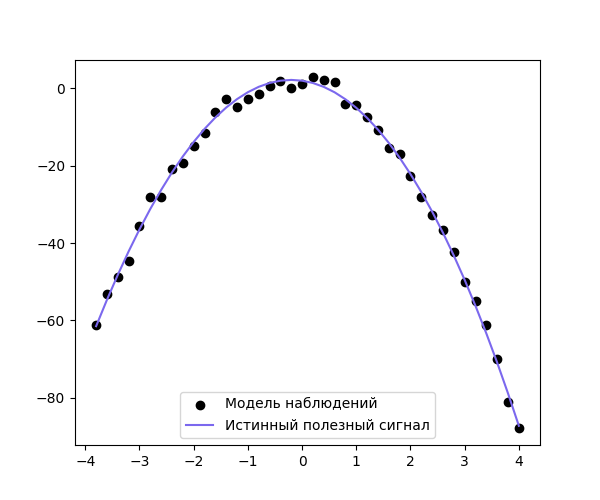

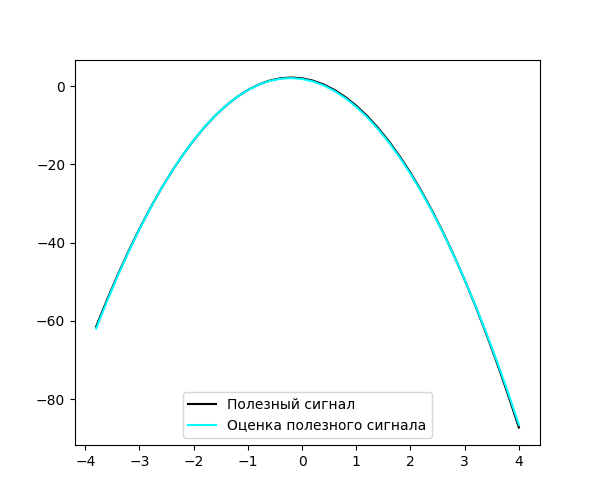

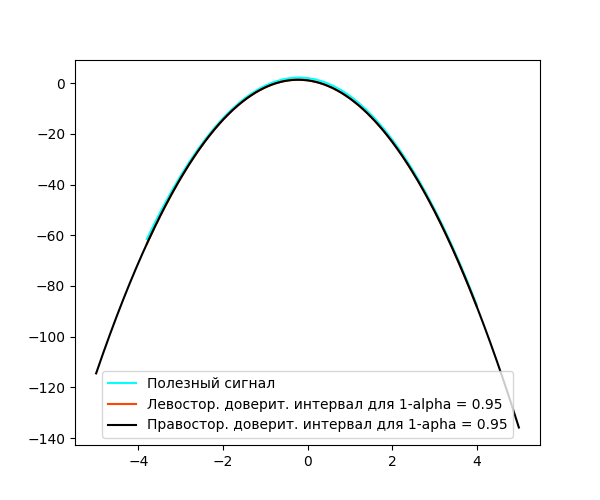

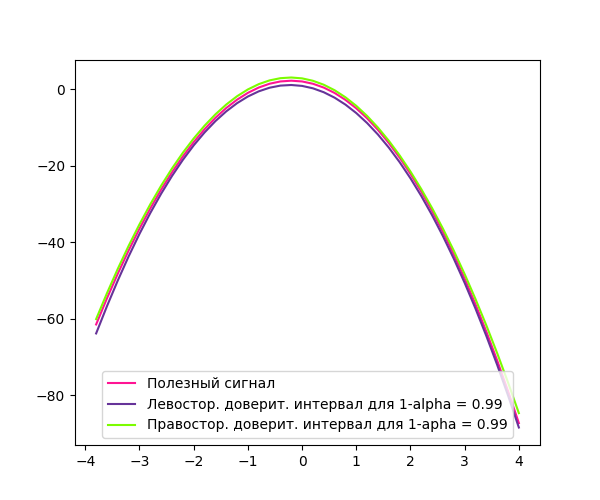

In [7]:
print("____________ЗАДАНИЕ №4____________ \n")
# Представить графически истинный полезный сигнал,
# • набор наблюдений,
# • оценку полезного сигнала, полученную в шаге 1,
# • доверительные интервалы полезного сигнала, полученные в шаге 3.


# def a95(x):
#     # TODO: remove global
#     # global Thetta, m, n, kvantil1, norm_E_sr, X_tr_X
#     Y_s = 0
#     X = []
#     for j in range(m + 1):
#         X.append(x**j)
#         Y_s += Thetta[j] * (x ** j)

#     # X_tr = np.transpose(X)
#     # X_tr_X = np.linalg.inv(np.matmul(X_tr, X))
#     X = np.array(X)
#     X_tr_X = np.linalg.inv(X.T @ X)
#     # TODO:
#     alfa1 = np.matmul(X, X_tr_X)
#     alfa = np.matmul(alfa1, np.transpose(X))
#     return Y_s - kvantil1 * norm_E_sr*np.sqrt(alfa/(n-m-1))

def a95(x):
    Y_s = 0
    X = []
    for j in range(m + 1):
        X.append(x**j)
        Y_s += Thetta[j] * (x ** j)
    alfa1 = np.matmul(X, X_tr_X)
    alfa = np.matmul(alfa1, np.transpose(X))
    return Y_s - kvantil1*norm_E_sr*np.sqrt(alfa/(n-m-1))


print("Построение графиков \n")
fig1, ax1 = plt.subplots()
# истинный полезный сигнал
ax1.scatter(x, Y, c='black')
# набор наблюдений
ax1.plot(x, Y_S, c='#7B68EE')
lgnd1 = ax1.legend(
    ['Модель наблюдений', 'Истинный полезный сигнал'], loc='lower center')
fig1.set_figwidth(6)
fig1.set_figheight(5)
plt.show()

fig4, ax4 = plt.subplots()
ax4.plot(x, Y_S, c='black')
ax4.plot(x, Y_signal, c='#00FFFF')
lgnd4 = ax4.legend(
    ['Полезный сигнал', 'Оценка полезного сигнала'], loc='lower center')
fig4.set_figwidth(6)
fig4.set_figheight(5)
plt.show()






fig2, ax2 = plt.subplots()
ax2.plot(x, Y_S, c='#00FFFF')
ax2.plot(x, a_95, c='#FF4500')


t_for_a_95 = np.linspace(-5, 5, 1000)
a_95_dots = [a95(dot) for dot in t_for_a_95]
ax2.plot(t_for_a_95, a_95_dots, c='#000000')

lgnd2 = ax2.legend(['Полезный сигнал', 'Левостор. доверит. интервал для 1-alpha = 0.95',
                   'Правостор. доверит. интервал для 1-apha = 0.95'], loc='lower center')
fig2.set_figwidth(6)
fig2.set_figheight(5)
plt.show()


fig3, ax3 = plt.subplots()
ax3.plot(x, Y_S, c='#FF1493')
ax3.plot(x, a_99, c='#663399')
ax3.plot(x, b_99, c='#7CFC00')
lgnd3 = ax3.legend(['Полезный сигнал', 'Левостор. доверит. интервал для 1-alpha = 0.99',
                   'Правостор. доверит. интервал для 1-apha = 0.99'], loc='lower center')
fig3.set_figwidth(6)
fig3.set_figheight(5)
plt.show()

____________ЗАДАНИЕ №5____________ 

Построение гистограммы 



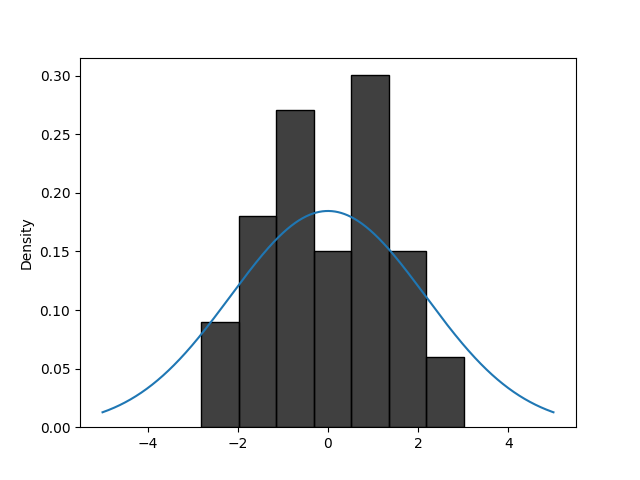

In [4]:
print("____________ЗАДАНИЕ №5____________ \n")
# По остаткам регрессии построить оценку плотности распределения случайной ошибки
# наблюдения в виде гистограммы.

print("Построение гистограммы \n")

fig5, ax5 = plt.subplots()
sns.histplot(E_sr, stat='density', kde=False, color='black', bins=7)

norm_disrtib_t = np.linspace(-5, 5, 1000)
plt.plot(norm_disrtib_t, norm.pdf(norm_disrtib_t, 0, σ_sr))

plt.show()


σ = 2.4
Θ_0 = (-1)**N * N

In [5]:
print("Оценка дисперсии случайной ошибки = ", template.format(σ_sr), "\n")

print("____________ЗАДАНИЕ №7____________ \n")
# По остаткам регрессии с помощью χ2-критерия Пирсона на уровне значимости 0.05 проверить
# гипотезу о том, что закон распределения  ошибки наблюдения является нормальным.

# кол-во разбиений
l = 7
t = np.zeros(l+2)
# 0.01 - небольшая погрешность
t[1] = 0.01+np.min(E_sr)
t[l] = 0.01+np.max(E_sr)
# ширина одного столбца гистограммы
step = abs(t[1]-t[l])/(l-1)

for i in range(l-2):
    t[i+2] = step + t[i+1]

t[l+1] = step + t[l]
t[0] = -step + t[1]


ni = np.zeros(l-1)
pid = np.zeros(l+1)
pi = np.zeros(l+1)

# pi^ = 0 на 0 и на l
pid[0] = 0
pid[l] = 0
# вычисление вероятности через функцию лапласа
for i in range(l+1):
    pi[i] = abs(sp.stats.norm.cdf(t[i+1]/σ_sr) - sp.stats.norm.cdf(t[i]/σ_sr))

# вычисление того, сколько ошибок попало в каждый интервал разбиения
print("Количество попавшее в столбцы:")
T = 0
for i in range(l-1):
    for j in range(n):
        if (E_sr[j] >= t[i]) and (E_sr[j] < t[i+1]):
            ni[i] += 1

    print(i, "\t", ni[i])

for i in range(l+1):
    T += (pi[i]-pid[i])**2/pi[i]
T = T*n

kvantil_hi = 12.6
if (T > kvantil_hi):
    print("T(Z) = ", template.format(T), "> kvantil_hi^2 = ", kvantil_hi,
          "=> гипотеза о том, что распределение нормальное, не принимается")
else:
    print("T(Z) = ", template.format(T), "< kvantil_hi^2 = ", kvantil_hi,
          "=> гипотеза о том, что распределение нормальное, принимается")


Оценка дисперсии случайной ошибки =  2.1623 

____________ЗАДАНИЕ №7____________ 

Количество попавшее в столбцы:
0 	 1.0
1 	 5.0
2 	 7.0
3 	 8.0
4 	 10.0
5 	 6.0
T(Z) =  37.0870 > kvantil_hi^2 =  12.6 => гипотеза о том, что распределение нормальное, не принимается
